In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
salary_data = pd.read_csv("Salary Prediction of Data Professions.csv")

In [23]:
salary_data.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


# Data Cleaning and EDA


In [24]:
data = salary_data[salary_data.columns[2:]]
data = data.dropna().reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2632 non-null   int64  
 1   SEX               2632 non-null   object 
 2   DOJ               2632 non-null   object 
 3   CURRENT DATE      2632 non-null   object 
 4   DESIGNATION       2632 non-null   object 
 5   AGE               2632 non-null   float64
 6   SALARY            2632 non-null   int64  
 7   UNIT              2632 non-null   object 
 8   LEAVES USED       2632 non-null   float64
 9   LEAVES REMAINING  2632 non-null   float64
 10  RATINGS           2632 non-null   float64
 11  PAST EXP          2632 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 246.9+ KB


In [25]:
data.head()

,index,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,5,F,2-19-2013,01-07-2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
4,6,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0


In [26]:
# Tasks
#-------Done----------#
#  visualize the average salary of each designation
# Visualize the various designations with their different units 
# Which designation and unit offers the highest salary compensation? The Director in the finance unit
# ------Visualization and Analysis-------#
# What is the relationship between the years of experience and the future salaries?
# Does past experience contribute to future earnings?
# Which job position is the most desired?(bar chart comparison)
# How does gender affect the employee's salary earnings?
# What is the relationship between an employees years of experience at a company and his salary? 
# What does the number of leaves taken say about the employees satisfaction with his role?

In [27]:
# Select the specified columns
designations = data["DESIGNATION"]
units = data["UNIT"]
# Identify all unique values in each column
designations = designations.unique()
units = units.unique()

In [28]:
designations

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [29]:
units

array(['Finance', 'IT', 'Marketing', 'Operations', 'Web', 'Management'],
      dtype=object)

In [30]:
data["DOJ"] = pd.to_datetime(data["DOJ"])
data["CURRENT DATE"] = pd.to_datetime(data["CURRENT DATE"])
data = data.drop("index", axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2632 non-null   object        
 1   DOJ               2632 non-null   datetime64[ns]
 2   CURRENT DATE      2632 non-null   datetime64[ns]
 3   DESIGNATION       2632 non-null   object        
 4   AGE               2632 non-null   float64       
 5   SALARY            2632 non-null   int64         
 6   UNIT              2632 non-null   object        
 7   LEAVES USED       2632 non-null   float64       
 8   LEAVES REMAINING  2632 non-null   float64       
 9   RATINGS           2632 non-null   float64       
 10  PAST EXP          2632 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 226.3+ KB


In [32]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000
mean,24.753799,58114.079787,22.497720,7.502280,3.486702,1.562310
std,3.904332,36861.179041,4.602397,4.602397,1.114081,2.725625
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46783.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51390.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [33]:
# Create a new feature column by calculating the employees work duration
data["Work Duration"] = data["CURRENT DATE"].dt.year - data["DOJ"].dt.year

In [34]:
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Work Duration
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2
1,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2
2,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,3
3,F,2013-02-19,2016-01-07,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0,3
4,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,3


# Visualize the average salary of each designation


In [35]:
# Convert leaves used and remaining to a new column that instead captures the percentage leaves used

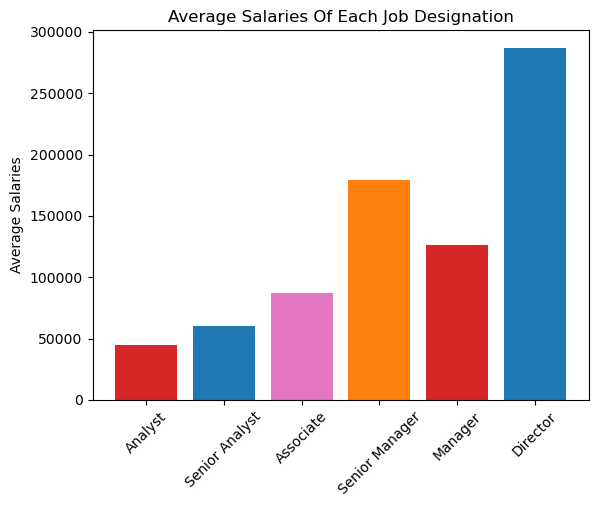

In [36]:
average_salaries = []

for i in range(len(designations)):
    designation = data.query(f'DESIGNATION == "{designations[i]}"')
    salaries = designation["SALARY"]
    average_salary = salaries.mean().round()
    average_salaries.append(average_salary)

# Bar chart Visualization
fig, ax = plt.subplots()
bar_colors = ["tab:red", "tab:blue", "tab:pink", "tab:orange"]
ax.bar(designations, average_salaries, color=bar_colors)
ax.set_ylabel("Average Salaries")
ax.set_title("Average Salaries Of Each Job Designation")
ax.tick_params(axis="x", rotation=45)

# Average salary in each designation and unit

In [37]:
average_salaries = []

for i in range(len(designations)):
    designation_n_unit_dict = dict()
    unit_n_average_salaries = []
    
    for j in range(len(units)):
        unit_n_salary_dict = dict()
        
        designation_n_unit = data.query(f'DESIGNATION == "{designations[i]}" & UNIT == "{units[j]}"')
        salary = designation_n_unit["SALARY"]
        average_salary = salary.mean().round()


        unit_n_salary_dict["unit"] = units[j]
        unit_n_salary_dict["average_salary"] = average_salary

        unit_n_average_salaries.append(unit_n_salary_dict)
    designation_n_unit_dict["designation"] = designations[i]
    designation_n_unit_dict["unit_average_salaries"] = unit_n_average_salaries
    average_salaries.append(designation_n_unit_dict)

[{'designation': 'Analyst',
  'unit_average_salaries': [{'unit': 'Finance', 'average_salary': 44915.0},
   {'unit': 'IT', 'average_salary': 44798.0},
   {'unit': 'Marketing', 'average_salary': 45070.0},
   {'unit': 'Operations', 'average_salary': 45193.0},
   {'unit': 'Web', 'average_salary': 45206.0},
   {'unit': 'Management', 'average_salary': 44975.0}]},
 {'designation': 'Senior Analyst',
  'unit_average_salaries': [{'unit': 'Finance', 'average_salary': 59840.0},
   {'unit': 'IT', 'average_salary': 60560.0},
   {'unit': 'Marketing', 'average_salary': 58758.0},
   {'unit': 'Operations', 'average_salary': 60285.0},
   {'unit': 'Web', 'average_salary': 60527.0},
   {'unit': 'Management', 'average_salary': 59744.0}]},
 {'designation': 'Associate',
  'unit_average_salaries': [{'unit': 'Finance', 'average_salary': 85585.0},
   {'unit': 'IT', 'average_salary': 85536.0},
   {'unit': 'Marketing', 'average_salary': 87331.0},
   {'unit': 'Operations', 'average_salary': 89877.0},
   {'unit': 'W

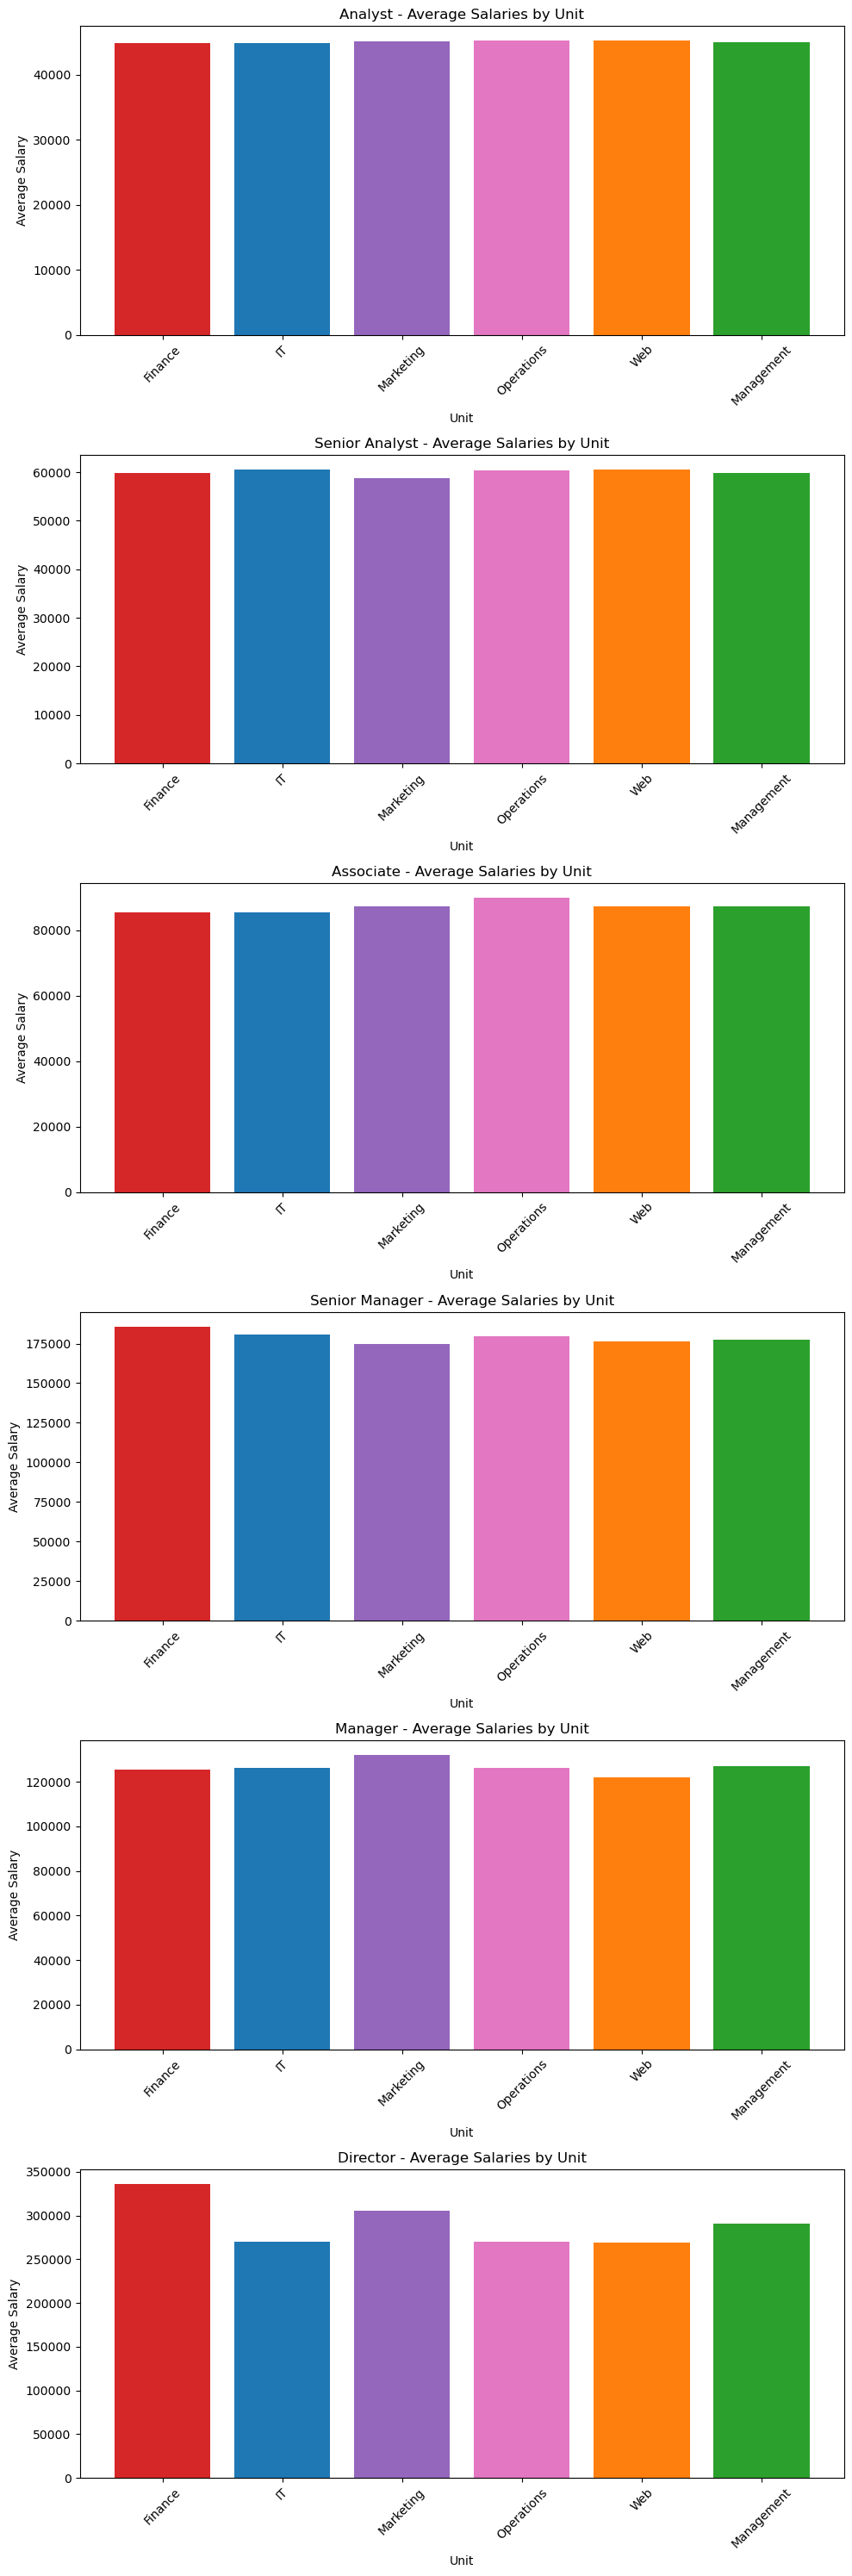

In [38]:
# Bar Chart visualization for Analyst
def plot_designation_salaries(designation_data):
    # Determine the number of subplots required
    num_designations = len(designation_data)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_designations, 1, figsize=(10, 5 * num_designations))
    
    # Ensure axes is iterable even if there is only one designation
    if num_designations == 1:
        axes = [axes]
    
    bar_colors = ["tab:red", "tab:blue", "tab:purple", "tab:pink", "tab:orange", "tab:green"]
    # Iterate over each designation data and corresponding axis
    for i, data in enumerate(designation_data):
        designation = data['designation']
        unit_salaries = data['unit_average_salaries']
        
        units = [item['unit'] for item in unit_salaries]
        average_salaries = [item['average_salary'] for item in unit_salaries]
        
        # Plot bar chart
        axes[i].bar(units, average_salaries, color=bar_colors)
        axes[i].set_title(f"{designation} - Average Salaries by Unit")
        axes[i].set_xlabel("Unit")
        axes[i].set_ylabel("Average Salary")
        axes[i].tick_params(axis='x', rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

plot_designation_salaries(average_salaries)

# Relationship between employee's work duration and salary


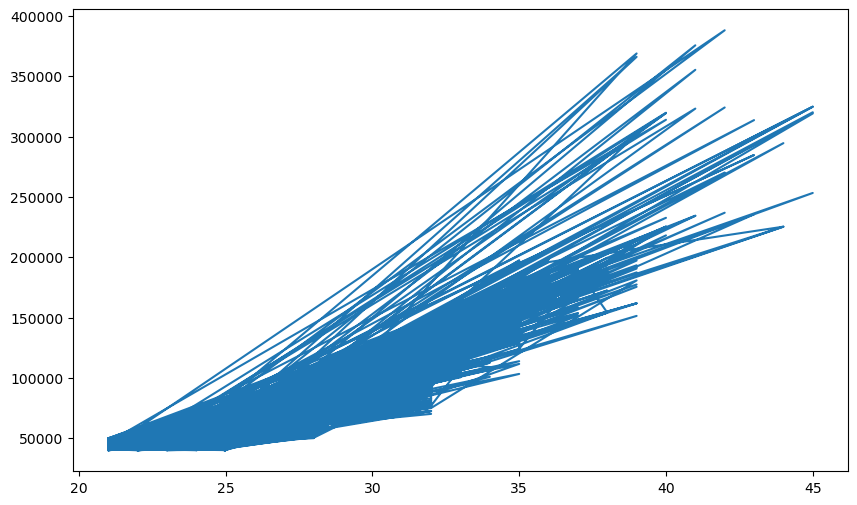

In [62]:

plt.figure(figsize=(10, 6))
plt.plot(data["AGE"], data["SALARY"])
# plt.title(f'Scatter Plot between {column_x} and {column_y}')
# plt.xlabel(column_x)
# plt.ylabel(column_y)
# plt.grid(True)
plt.show()

